# **🏠 부동산 실거래가 Baseline code**
> 부동산 실거래가 예측 대회에 오신 여러분 환영합니다! 🎉     
> 아래 baseline에서는 RandomForest를 활용해 ML 방법론들을 실제 대회에 적용해보도록 하겠습니다.
> 강의는 google colab으로 실행하였기에 아래의 베이스라인 코드와는 일부 차이가 있을 수 있습니다. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- 필요한 라이브러리를 불러옵니다.

In [1]:
!pip install eli5==0.13.0

# 한글 폰트 사용을 위한 라이브러리입니다.
!apt-get install -y fonts-nanum

zsh:1: command not found: apt-get


## 2. Data Load

#### 2.1. 데이터 로드

In [31]:
import os
os.getcwd()

'/data/ephemeral/home/code'

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

In [3]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [4]:
dt_test.columns = dt_test.columns.str.replace(' ', '')

dt_test.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비업로드',
       '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [16]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [5]:
dt_test['층'].value_counts()

 6     599
 4     588
 8     577
 5     560
 7     554
 2     538
 9     536
 3     528
 10    521
 11    501
 12    447
 14    439
 13    435
 15    424
 1     417
 17    238
 16    230
 18    221
 19    176
 20    122
 21     96
 22     93
 23     75
 24     69
 25     57
 26     40
 27     35
 28     32
 29     18
 34     12
 33     11
 32     11
 30     10
 35      9
 31      8
 37      5
 39      5
 38      4
 36      4
 41      3
 45      3
 43      3
 42      3
 40      3
-1       2
 46      2
 44      1
 65      1
 58      1
 62      1
 53      1
 50      1
 55      1
-3       1
Name: 층, dtype: int64

In [6]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
dt['is_test'] = 0
dt_test['is_test'] = 1

concat = pd.concat([dt, dt_test])     # 하나의 데이터로 만들어줍니다.

In [7]:
# concat['층'].value_counts()
concat[concat['is_test'] == 1]['층'].value_counts()

 6     599
 4     588
 8     577
 5     560
 7     554
 2     538
 9     536
 3     528
 10    521
 11    501
 12    447
 14    439
 13    435
 15    424
 1     417
 17    238
 16    230
 18    221
 19    176
 20    122
 21     96
 22     93
 23     75
 24     69
 25     57
 26     40
 27     35
 28     32
 29     18
 34     12
 33     11
 32     11
 30     10
 35      9
 31      8
 37      5
 39      5
 38      4
 36      4
 41      3
 45      3
 43      3
 42      3
 40      3
-1       2
 46      2
 44      1
 65      1
 58      1
 62      1
 53      1
 50      1
 55      1
-3       1
Name: 층, dtype: int64

In [8]:
# 칼럼 이름을 쉽게 바꿔주겠습니다. 다른 칼럼도 사용에 따라 바꿔주셔도 됩니다!
concat = concat.rename(columns={'전용면적(㎡)':'전용면적'})

In [9]:
# 주소로 unique id를 만들어봅니다

concat['본번'] = concat['본번'].fillna(-1)
concat['부번'] = concat['부번'].fillna(-1)

concat['본번'] = concat['본번'].astype(int).astype(str).replace({-1: np.nan})
concat['부번'] = concat['부번'].astype(int).astype(str).replace({-1: np.nan})

concat['지번_temp'] = concat['본번'] + '-' + concat['부번']

concat['번지'] = concat['번지'].fillna(concat['지번_temp'])
concat['번지'].isnull().sum()

concat = concat.drop('지번_temp', axis=1)

In [10]:
# 본번, 부번의 경우 float로 되어있지만 범주형 변수의 의미를 가지므로 object(string) 형태로 바꾸어주고 아래 작업을 진행하겠습니다.
concat['본번'] = concat['본번'].astype('str')
concat['부번'] = concat['부번'].astype('str')


# '시군구'와 '번지'를 이용해 unique id를 만들어준다
concat['주소'] = concat['시군구'] + ' ' + concat['번지']

In [11]:
concat[concat['is_test'] == 1]['층'].value_counts()

 6     599
 4     588
 8     577
 5     560
 7     554
 2     538
 9     536
 3     528
 10    521
 11    501
 12    447
 14    439
 13    435
 15    424
 1     417
 17    238
 16    230
 18    221
 19    176
 20    122
 21     96
 22     93
 23     75
 24     69
 25     57
 26     40
 27     35
 28     32
 29     18
 34     12
 33     11
 32     11
 30     10
 35      9
 31      8
 37      5
 39      5
 38      4
 36      4
 41      3
 45      3
 43      3
 42      3
 40      3
-1       2
 46      2
 44      1
 65      1
 58      1
 62      1
 53      1
 50      1
 55      1
-3       1
Name: 층, dtype: int64

### xy좌표 결측치를 제거해봅니다

In [12]:
concat['is_test'].value_counts()

0    1118822
1       9272
Name: is_test, dtype: int64

In [190]:
concat_temp = concat

In [13]:
# xy좌표를 불러오고 unique id를 맞춰준다

coordinates = pd.read_csv('../data/xy좌표.csv', encoding='cp949')

coordinates['주소'] = coordinates['시군구'] + ' ' + coordinates['번지']

In [14]:
concat['is_test'].value_counts()

0    1118822
1       9272
Name: is_test, dtype: int64

In [207]:
coordinates['주소'].head()

0    서울특별시 금천구 독산동 1022-124
1    서울특별시 금천구 독산동 1022-120
2      서울특별시 종로구 창신동 595-99
3     서울특별시 종로구 창신동 595-247
4     서울특별시 금천구 독산동 1037-23
Name: 주소, dtype: object

In [ ]:
import pandasql as psql

# SQL 쿼리로 병합
query = """
SELECT concat.*, coordinates.x, coordinates.y
FROM concat
LEFT JOIN coordinates
ON concat.주소 = coordinates.주소
"""
result = psql.sqldf(query, locals())

print(result)

In [15]:
concat_temp = pd.merge(concat, coordinates, left_on='주소', right_on='주소', how='left', suffixes=('_A', '_B'))

concat = concat_temp

concat = concat.drop(columns=['시군구_B', '번지_B'])

concat = concat.rename(columns={'시군구_A':'시군구'})
concat = concat.rename(columns={'번지_A':'번지'})

concat['is_test'].value_counts()

0    1131730
1       9272
Name: is_test, dtype: int64

### xy좌표 결측치 채우기(주소로 정렬한 후 선형보간으로 채우기)

In [36]:
# xy좌표 결측치 채우기(주소로 정렬한 후 선형보간으로 채우기)

concat_sorted = concat.sort_values(by='주소')

# 연속형 변수에 대한 보간 (선형 보간)
col = ['x', 'y']
concat_sorted[col] = concat_sorted[col].interpolate(method='linear', axis=0)

concat = concat_sorted.sort_index()

In [37]:
concat['계약년월'] = concat['계약년월'].astype(str)

concat['계약년'] = concat['계약년월'].str[:4]
concat['계약월'] = concat['계약년월'].str[4:]

concat['계약년'] = concat['계약년'].astype(int)
concat['계약월'] = concat['계약월'].astype(int)

In [38]:
# 해제사유발생 = 1, 미발생 = 0 으로 바꾸기

concat['거래취소여부'] = concat['해제사유발생일'].notnull().astype(int)

concat['거래취소여부'].value_counts()

concat = concat.drop(columns = '해제사유발생일',  errors='ignore')

In [39]:
# 불필요한 컬럼 제거

drop_columns = ['아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', '좌표X', '좌표Y','계약년월'
                'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-관리방식', 'k-난방방식', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
                'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지', '단지승인일',
                'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '기타/의무/임대/임의=1/2/3/4', '사용허가여부', '관리비 업로드', '단지신청일'
                ]

concat = concat.drop(columns = drop_columns,  errors='ignore')

In [40]:
# 거래일 건물연식

concat['거래일건물연식'] = concat['계약년'] - concat['건축년도']

In [41]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
concat['구'] = concat['시군구'].map(lambda x : x.split()[1])
concat['동'] = concat['시군구'].map(lambda x : x.split()[2])
del concat['시군구']

# concat_select['계약년'] = concat_select['계약년월'].astype('str').map(lambda x : x[:4])
# concat_select['계약월'] = concat_select['계약년월'].astype('str').map(lambda x : x[4:])
del concat['계약년월']

In [42]:
all = list(concat['구'].unique())
gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # 알맞게 분리되었는지 체크합니다.

# 강남의 여부를 체크합니다.
is_gangnam = []
for x in concat['구'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# 파생변수를 하나 만릅니다.
concat['강남여부'] = is_gangnam

In [ ]:
concat[concat['is_test'] == 1]['층'].value_counts()

In [44]:
# 따라서 2009년 이후에 지어졌으면 비교적 신축이라고 판단하고, 신축 여부 변수를 제작해보도록 하겠습니다.
# 노후건축물 기준에 맞추어 거래일 기준 20년 미만일 시 신축으로 분류
concat['신축여부'] = concat['거래일건물연식'].apply(lambda x: 1 if x < 20 else 0)

In [45]:
# EDA에 앞서 결측치를 확인해보겠습니다.
concat.isnull().sum()

# concat.columns

번지                          0
본번                          0
부번                          0
전용면적                        0
계약일                         0
층                           0
건축년도                        0
k-단지분류(아파트,주상복합등등)     883139
k-전화번호                 882722
k-세대타입(분양형태)           882011
k-복도유형                 882338
k-전체동수                 883078
k-전체세대수                882011
k-건설사(시공사)             883506
건축면적                   882162
주차대수                   882162
target                   9272
is_test                     0
관리비업로드                1131730
주소                          0
x                          91
y                          91
계약년                         0
계약월                         0
거래취소여부                      0
거래일건물연식                     0
구                           0
동                           0
강남여부                        0
신축여부                        0
dtype: int64

In [194]:
concat.to_csv('../data/base_dataset.csv', index=False)

### 기본 데이터셋 정의

In [46]:
# 위 코드까지 실행할 결과를 새로운 기본 데이터셋으로 삼음
# concat = pd.read_csv('../data/base_dataset.csv')

drop_col = ['k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-복도유형', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '건축면적', '주차대수']

concat = concat.drop(columns = drop_col, errors = 'ignore')

### 빈 데이터를 채움

In [47]:
# 지번별 건물정보가 담긴 gis건물통합정보 파일을 불러와 데이터 병합하기

gis = pd.read_csv('../data/gis건물통합정보.csv')

drop_col = ['Unnamed: 0', '법정동명', '번지', '사용승인일자']
gis = gis.drop(columns = drop_col)

gis = gis.rename(columns={'ID':'주소'})

gis= gis.groupby('주소', as_index=False).agg({'건축면적': 'sum', '연면적': 'sum', '대지면적': 'sum', '건폐율': 'sum', '용적율': 'sum'})

gis.head()

,주소,건축면적,연면적,대지면적,건폐율,용적율
0,서울특별시 강남구 개포동 1055,507.18,11729.79,3017.0,16.81,51.99
1,서울특별시 강남구 개포동 1057-9,608.80,1359.20,3062.0,19.88,39.76
2,서울특별시 강남구 개포동 108,0.00,0.00,0.0,0.00,0.00
3,서울특별시 강남구 개포동 109,0.00,0.00,0.0,0.00,0.00
4,서울특별시 강남구 개포동 112-1,0.00,0.00,0.0,0.00,0.00


In [58]:
concat_temp = pd.merge(concat, gis, on='주소', how='left', suffixes=('_A', '_B'))

In [59]:
concat_t = concat_temp[concat_temp['is_test'] == 0]

concat_t['연면적'].describe()

count    1063533.000000
mean      113817.892817
std       277271.897936
min            0.000000
25%        25492.580000
50%        60923.610000
75%       136350.850000
max     15297327.000000
Name: 연면적, dtype: float64

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 사용 보간
concat_temp = pd.merge(concat, gis, on='주소', how='left', suffixes=('_A', '_B'))
concat_temp.sort_values('주소')

col = ['건축면적', '연면적', '대지면적', '건폐율', '용적율']
concat_temp[col] = concat_temp[col].replace(0, np.nan)

imputer = IterativeImputer(max_iter=10, random_state=0)
concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])


concat_temp.sort_index()

concat = concat_temp

In [73]:
concat['거래취소여부'].astype(str)
concat['강남여부'].astype(str)
concat['층'].astype(str)
concat['본번'].astype(str)
concat['부번'].astype(str)

0          1
1          1
2          1
3          1
4          1
          ..
1141115    0
1141116    0
1141117    0
1141118    0
1141119    0
Name: 부번, Length: 1141120, dtype: object

In [74]:
# concat.to_csv('../data/base_dataset_1.csv', index=False)

### target값을 제곱미터당 가격으로 변경

In [112]:
concat = pd.read_csv('../data/base_dataset_1.csv')

In [113]:
# 평균층수 파생변수 추가
concat['평균층수'] = concat['연면적'] / concat['건축면적']

In [114]:
# target값을 평당 가격으로 바꿈 -> 최종 결과때 다시 new_target을 전용면적으로 곱하여 rmes구해야함

concat.rename(columns={'target': 'target_original'}, inplace=True)

concat['target'] = concat['target_original'] / concat['전용면적']

# concat.info()

In [115]:
concat = concat.drop(columns = 'target_original')

In [116]:
str_columns = ['본번', '부번', '거래취소여부', '구', '동', '강남여부', '신축여부']

concat[str_columns] = concat[str_columns].astype(str)

# concat.info()

In [117]:
# concat.to_csv('../data/base_dataset_2.csv', index=False)

In [46]:
# # 인구증감율 or 인구수
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# population = pd.read_csv('../data/population.csv')

# population['20대'] = population['20 - 24세'] + population['25 - 29세']
# population['30대'] = population['30 - 34세'] + population['35 - 39세']
# population['40대'] = population['40 - 44세'] + population['45 - 49세']

# pop = population[['index', '20대', '30대', '40대']]
# pop = pop.rename(columns = {'index': '계약년월'})
# pop['계약년월'] = pop['계약년월'].astype(str)

# pop['20대'] = pop['20대'].diff()
# pop['30대'] = pop['30대'].diff()
# pop['40대'] = pop['40대'].diff()

# concat_temp = pd.merge(concat, pop, on='계약년월', how='left', suffixes=('_A', '_B'))


# col = ['20대', '30대', '40대']

# imputer = IterativeImputer(max_iter=10, random_state=0)
# concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])

# concat_temp.head()
# concat = concat_temp

In [95]:
# # 혼인율
# marriage = pd.read_csv('../data/혼인율.csv')

# marriage = marriage.T

# marriage.columns = marriage.iloc[0]
# marriage = marriage.drop(index='시군구별')

# marriage = marriage.reset_index()
# marriage = marriage[['index', '서울특별시']]

# marriage['index'] = marriage['index'].str.replace('.', '')
# marriage = marriage.rename(columns = {'index' : '계약년월', '서울특별시' : '혼인건수'})

# marriage.head()

# concat = pd.merge(concat, marriage, on='계약년월', how='left', suffixes=('_A', '_B'))

# concat['혼인건수'] = concat['혼인건수'].astype(int)


In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

### dataset_2 시작

In [153]:
# concat = pd.read_csv('../data/base_dataset_2.csv')

In [3]:
concat3 = pd.read_csv('../data/base_dataset_3.csv')

In [63]:
concat[concat['is_test'] == 1]['층'].value_counts()

 6     599
 4     588
 8     577
 5     560
 7     554
 2     538
 9     536
 3     528
 10    521
 11    501
 12    447
 14    439
 13    435
 15    424
 1     417
 17    238
 16    230
 18    221
 19    176
 20    122
 21     96
 22     93
 23     75
 24     69
 25     57
 26     40
 27     35
 28     32
 29     18
 34     12
 33     11
 32     11
 30     10
 35      9
 31      8
 37      5
 39      5
 38      4
 36      4
 41      3
 45      3
 43      3
 42      3
 40      3
-1       2
 46      2
 44      1
 65      1
 58      1
 62      1
 53      1
 50      1
 55      1
-3       1
Name: 층, dtype: int64

In [64]:
concat['층'].value_counts()

 5     82748
 4     82633
 3     81089
 2     77575
 6     74215
       ...  
 68        6
 65        6
 67        6
-4         4
 69        2
Name: 층, Length: 73, dtype: int64

In [25]:
concat['계약월'] = concat['계약월'].astype(str).str.zfill(2)

In [26]:
# 금리데이터를 넣습니다

concat['계약년월'] = concat['계약년'].astype(str) + '' + concat['계약월'].astype(str)

interest = pd.read_csv('../data/한국기준금리07-23.csv')

interest['날짜'] = interest['날짜'].astype(str)
interest['계약년월'] = interest['날짜'].str[:6]
interest.drop(columns = '날짜', inplace = True)

In [27]:
# interest['계약년월'].fillna('-1')
# interest['계약년월'] = interest['계약년월'].astype(str)
concat['계약년월'] = concat['계약년월'].astype(str)

concat_temp = pd.merge(concat, interest, on='계약년월', how='left', suffixes=('_A', '_B'))

# concat_temp.drop(columns='계약년월', inplace=True)
concat = concat_temp

In [28]:
# 평형별로 초소형, 소형, 중형, 대형으로 분류

bins = [0, 26, 50, 60, 85, 135, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

concat['면적분류'] = pd.cut(concat['전용면적'], bins=bins, labels=labels, right=False)

In [29]:
# 층 이상치 제거

train1 = concat.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
test1 = concat.query('is_test == 1')

# train1 = train1[train1['층'] >= 1]

# 거래일 건물연식 이상치 제거
train1 = train1[train1['거래일건물연식'] >= 0]

# 옛날 계약 데이터 삭제 - 12년도 이전 삭제해봄
# train1 = train1[train1['계약년'] >= 2012]

concat = pd.concat([train1, test1])


In [30]:
concat['is_test'].value_counts()

0    1165286
1       9272
Name: is_test, dtype: int64

In [31]:
concat.loc[(concat['층'] < 1), '층'] = 1

In [32]:
concat['층'].value_counts()

5     86427
4     86219
3     84736
2     80981
6     77350
      ...  
61        8
68        6
65        6
67        6
69        2
Name: 층, Length: 69, dtype: int64

In [35]:
#IQR 이상치 제거


# train1 = concat.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
# test1 = concat.query('is_test == 1')
def iqr_both(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df

def iqr_upper(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] <= upper_bound)]

    return df

def iqr_lower(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    df = df[(df[column_name] >= lower_bound)]

    return df


train1 = iqr_upper(train1, '연면적')
# train1 = iqr_lower(train1, '계약년')
# train1 = iqr_both(train1, 'target')

# concat = pd.concat([train1, test1])
# train1['계약년'].describe()

concat = pd.concat([train1, test1])

In [33]:
pd.set_option('display.float_format', '{:.6f}'.format)

concat['층'].value_counts()

5     86427
4     86219
3     84736
2     80981
6     77350
      ...  
61        8
68        6
65        6
67        6
69        2
Name: 층, Length: 69, dtype: int64

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


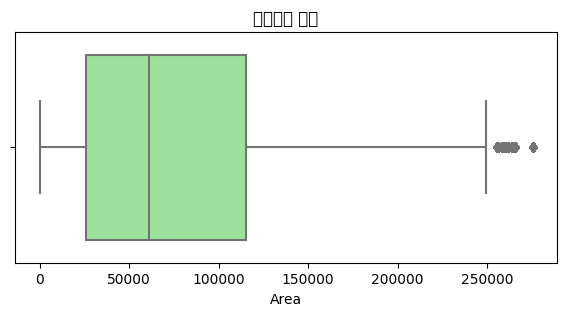

In [36]:
# 기타 이상치를 확인해봄

pd.set_option('display.float_format', '{:.6f}'.format)

concat['층'].describe()

fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = train1, x = '연면적', color='lightgreen')
plt.title('건축년도 분포')
plt.xlabel('Area')
plt.show()

In [ ]:
# sns.histplot(concat['연면적'], kde=True)
# plt.title('연면적')
# plt.xlabel('건축년도')
# plt.ylabel('year')
# plt.show()

In [58]:
concat.columns

Index(['번지', '본번', '부번', '전용면적', '계약일', '층', '건축년도', 'target', 'is_test', '주소',
       'x', 'y', '계약년', '계약월', '거래취소여부', '거래일건물연식', '구', '동', '강남여부', '신축여부',
       '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', '계약년월', '기준금리', '면적분류'],
      dtype='object')

In [37]:
# 타임스플릿 전에 날짜별로 sorting해봄

concat.rename(columns={'계약년': 'year', '계약월': 'month', '계약일': 'day'}, inplace=True)
concat['계약날짜'] = pd.to_datetime(concat[['year', 'month', 'day']])

concat = concat.drop(['year', 'month', 'day'], axis=1)

concat = concat.sort_values(by='계약날짜').reset_index(drop=True)

In [38]:
str_columns = ['본번', '부번', '거래취소여부', '구', '동', '강남여부', '신축여부', '계약년월', '면적분류']

concat[str_columns] = concat[str_columns].astype(str)
concat['면적분류'] = concat['면적분류'].astype(int)
# concat['계약월'] = concat['계약월'].astype(int)
# concat['계약날짜'] = concat['계약날짜'].astype(str)

In [39]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적', '층', '건축년도', 'target', 'is_test', 'x', 'y', '거래일건물연식', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', '기준금리', '면적분류']
범주형 변수: ['번지', '본번', '부번', '주소', '거래취소여부', '구', '동', '강남여부', '신축여부', '계약년월', '계약날짜']


In [41]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [42]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat_select = remove_outliers_iqr(concat, '전용면적')

In [43]:
concat_select.to_csv('./data/dataset_5.csv')

In [20]:
import os
os.getcwd()

'/Users/kwonsejin/Desktop/APT_Predict_ML/code'

In [6]:
concat = pd.read_csv('./data/dataset_6.csv')

In [5]:
concat.head()

(1002718, 28)

In [10]:

concat.rename(columns={'Unnamed: 0' : 'original_index'}, inplace=True)

# concat.head()

In [11]:
# concat['original_index'] = concat.index

concat['계약날짜'] = pd.to_datetime(concat['계약날짜'])
concat.set_index('계약날짜', inplace=True)

daily_trades = concat.groupby(concat.index).size()

# 이동평균 만들기
concat['3m이동평균'] = concat['target'].resample('D').mean().rolling(window=90).mean()
concat['12m이동평균'] = concat['target'].resample('D').mean().rolling(window=360).mean()
concat['48m이동평균'] = concat['target'].resample('D').mean().rolling(window=1440).mean()

# 거래량 데이터 만들기

day_t = pd.DataFrame(daily_trades, columns=['trades'])

day_t['30d_trades'] = day_t['trades'].rolling(window=30).sum()

concat['30d_trades'] = concat.index.map(day_t['30d_trades'])
concat['day_trades'] = concat.index.map(day_t['trades'])

# concat.head()

In [12]:

concat['계약년월'] = pd.to_datetime(concat['계약년월'].astype(str), format='%Y%m')

In [13]:
# #1일 평균가격

# daily_price = concat.groupby(concat.index)['target'].mean()

# concat['day_price'] = concat.index.map(daily_price)

# #월 평균가격
# monthly_price = concat.groupby('계약년월')['target'].mean()

# concat['month_price'] = concat['계약년월'].map(monthly_price)

# concat.head()

In [14]:
# #작년 동월 기준 변화량

# monthly_avg = concat.groupby('계약년월')['target'].mean()

# monthly_per = (monthly_avg - monthly_avg.shift(12)) / monthly_avg.shift(12) * 100

# concat['작년동월변화량'] = concat['계약년월'].map(monthly_per)

# #지난달 기준 변화량

# monthly_avg = concat.groupby('계약년월')['target'].mean()

# month_diff = (monthly_avg - monthly_avg.shift(1)) / monthly_avg.shift(1) * 100

# concat['지난달변화량'] = concat['계약년월'].map(month_diff)

In [15]:
concat.columns

Index(['original_index', '번지', '본번', '부번', '전용면적', '층', '건축년도', 'target',
       'is_test', '주소', 'x', 'y', '거래취소여부', '거래일건물연식', '구', '동', '강남여부',
       '신축여부', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', '계약년월', '기준금리',
       '면적분류', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades', 'day_trades',
       'day_price', 'month_price', '작년동월변화량', '지난달변화량'],
      dtype='object')

In [16]:
# #거래량 파생변수

# daily_trades = concat.groupby(concat.index).size()

# daily_trades['30d_trades'] = daily_trades.rolling(window=30).sum()

# monthly_volume = daily_trades.resample('M').sum()

# monthly_volume_last = monthly_volume.shift(1)

# concat['월별 거래량'] = concat.index.map(monthly_volume)
# # concat['지난달 거래량'] = concat.index.map(monthly_volume_last)

# # concat.head()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# fig.set_facecolor('white')
# # plt.plot(concat.index, concat['target'], color='k', label='price')
# plt.plot(concat.index, concat['지난달변화량'], color='red', label='1m')
# # plt.plot(concat.index, concat['3m이동평균'], color='blue', label='1m')
# # plt.plot(concat.index, concat['6m이동평균'], color='green', label='1m')
# plt.legend()
# plt.title('apartment price',fontsize=15)
# plt.show()

In [ ]:
# # 지난달 거래량 지표
# monthly_trade = concat.resample('M').sum()

# concat['지난달 거래량'] = monthly_trade['target'].shift(1)

In [138]:
concat.columns

Index(['original_index', '번지', '본번', '부번', '전용면적', '층', '건축년도', 'target',
       'is_test', '주소', 'x', 'y', '거래취소여부', '거래일건물연식', '구', '동', '강남여부',
       '신축여부', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', '계약년월', '기준금리',
       '면적분류', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades', 'trades',
       'day_price', 'month_price', '작년동월변화량', '지난달변화량'],
      dtype='object')

In [17]:
concat['계약년월'] = concat['계약년월'].astype(str)

In [19]:
# concat.to_csv('./data/dataset_6.csv', index=False)

In [7]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [62]:
concat = pd.read_csv('./data/dataset_6_index.csv')

In [9]:
concat.columns

Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', 'target', 'is_test', '주소', 'x',
       'y', '거래취소여부', '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적',
       '대지면적', '건폐율', '용적율', '평균층수', 'index', '계약년월', '기준금리', '면적분류', '1m이동평균',
       '3m이동평균', '6m이동평균', '30d_trades', 'day_trades'],
      dtype='object')

In [42]:
concat.head()

,전용면적,층,건축년도,target,is_test,주소,x,y,거래취소여부,거래일건물연식,...,평균층수,index,계약년월,기준금리,면적분류,1m이동평균,3m이동평균,6m이동평균,30d_trades,day_trades
0,59.980,15,1999,500.166722,0,서울특별시 강서구 마곡동 429,126.837836,37.575733,0,8,...,11.640644,1082777,2007-01-01,4.5,2,NaN,NaN,NaN,NaN,14
1,45.440,5,1987,253.080986,0,서울특별시 중랑구 면목동 193-1,127.075465,37.587504,0,20,...,13.342047,1116446,2007-01-01,4.5,1,NaN,NaN,NaN,NaN,14
2,59.340,8,1996,370.744860,0,서울특별시 노원구 중계동 445,127.072945,37.656181,0,11,...,15.772714,1094076,2007-01-01,4.5,2,NaN,NaN,NaN,NaN,14
3,164.760,15,1997,467.346443,0,서울특별시 동작구 신대방동 395-62,126.923632,37.492589,0,10,...,25.926023,1101807,2007-01-01,4.5,4,NaN,NaN,NaN,NaN,14
4,84.354,1,2002,278.587856,0,서울특별시 도봉구 도봉동 647,127.050721,37.684371,0,5,...,12.884379,1096033,2007-01-01,4.5,3,NaN,NaN,NaN,NaN,14


In [51]:
concat.drop(columns = 'Unnamed: 0', inplace = True, errors = 'ignore')

In [50]:
# 레이블링을 위해 추가
drop_col = ['original_index', '본번', '부번', '번지']
concat.drop(columns = drop_col, inplace = True, errors = 'ignore')

In [51]:
concat['target'] = concat['target'] / concat['전용면적']

In [52]:
concat['계약년월'] = concat['계약년월'].astype(str)

In [15]:
concat.isnull().sum()

전용면적               0
층                  0
건축년도               0
target          9272
is_test            0
주소                 0
x                  0
y                  0
거래취소여부             0
거래일건물연식            0
구                  0
동                  0
강남여부               0
신축여부               0
건축면적               0
연면적                0
대지면적               0
건폐율                0
용적율                0
평균층수               0
index              0
계약년월               0
기준금리           41901
면적분류               0
1m이동평균         34580
3m이동평균         76547
6m이동평균        149990
30d_trades      3931
day_trades         0
dtype: int64

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 사용 보간

concat_temp = concat

col = ['건축면적', '연면적', '대지면적', '건폐율', '용적율', '기준금리', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades']
concat_temp[col] = concat_temp[col].replace(0, np.nan)

imputer = IterativeImputer(max_iter=10, random_state=0)
concat_temp[col] = pd.DataFrame(imputer.fit_transform(concat_temp[col]), columns=[col])


concat_temp.isnull().sum()

concat = concat_temp

concat['target']

0          500.166722
1          253.080986
2          370.744860
3          467.346443
4          278.587856
              ...    
1083588           NaN
1083589           NaN
1083590           NaN
1083591           NaN
1083592           NaN
Name: target, Length: 1083593, dtype: float64

In [54]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat.query('is_test==0')
dt_test = concat.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

(1074321, 28) (9272, 28)


In [57]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

연속형 변수: ['전용면적', '층', '건축년도', 'target', 'x', 'y', '거래취소여부', '거래일건물연식', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'index', '기준금리', '면적분류', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades', 'day_trades']
범주형 변수: ['주소', '구', '동', '계약년월']


100%|██████████| 4/4 [00:01<00:00,  3.50it/s]


In [59]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler

features = dt_train.drop('target', axis=1).values
target = dt_train['target'].values

# Robust Scaler 사용
scaler = RobustScaler()
features_scaled = scaler.fit_transform(features)

# 시계열 데이터로 변환 (samples, time_steps, features)
time_steps = 30  # 예를 들어 30일간의 데이터를 한 샘플로 사용
x, y = [], []

for i in range(time_steps, len(features_scaled)):
    x.append(features_scaled[i-time_steps:i, :])  # 30일간의 데이터를 하나의 시퀀스로
    y.append(target[i])  # 해당 시점의 가격을 타겟으로

x, y = np.array(x), np.array(y)

# TimeSeriesSplit 정의 (분할 개수를 설정)
tscv = TimeSeriesSplit(n_splits=5)



In [ ]:
# 각 분할에 대해 LSTM 모델 학습 및 평가
for train_index, test_index in tscv.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # LSTM 모델 구성
    model = Sequential()
    
    # 첫 번째 LSTM 레이어
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    
    # 두 번째 LSTM 레이어
    model.add(LSTM(units=50, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    
    # 출력층
    model.add(Dense(units=1))
    
    # 모델 컴파일
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 모델 학습
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
    
    # 모델 예측
    predicted_price = model.predict(X_test)

In [65]:
model.save('./data/lstm_model.keras')

In [71]:
predicted_price_original = scaler.inverse_transform(predicted_price)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (179048,1) doesn't match the broadcast shape (179048,27)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test_original, predicted_price_original))
print(f"Fold RMSE: {rmse}")

Fold RMSE: 1231.3648901572346


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [66]:
# model = load_model(model_path)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 30, 50)         │        15,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,555 (420.14 KB)

 Trainable params: 35,851 (140.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,704 (280.10 KB)

In [56]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

concat_select = concat

연속형 변수: ['전용면적', '층', '건축년도', 'target', 'is_test', 'x', 'y', '거래취소여부', '거래일건물연식', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'index', '기준금리', '면적분류', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades', 'day_trades']
범주형 변수: ['주소', '구', '동', '계약년월']


In [17]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

(1074321, 28) (9272, 28)


In [19]:
dt_test1 = dt_test
dt_train1 = dt_train

In [55]:
# rmse를 구해 정확한 성능평가를 위해 dt_train의 최근3개월을 나누어 dt_test1을 만들고 dt_train1은 나머지값으로 두고 이를 이용해 학습시킴
dt_train['계약년월'] = pd.to_datetime(dt_train['계약년월'], format='%Y%m')

three_months_ago = dt_train['계약년월'].max() - pd.DateOffset(months=3)
dt_test1 = dt_train[dt_train['계약년월'] > three_months_ago]
dt_train1 = dt_train[dt_train['계약년월'] <= three_months_ago]

dt_train1['계약년월'] = dt_train1['계약년월'].astype(str)
dt_test1['계약년월'] = dt_test1['계약년월'].astype(str)

print(dt_test1.shape, dt_train1.shape)

dt_test1_val = dt_test1['target']

(8838, 26) (984608, 26)


In [20]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train1.columns:
    if pd.api.types.is_numeric_dtype(dt_train1[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train1[col].astype(str) )
    dt_train1[col] = lbl.transform(dt_train1[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test1[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test1[col] = lbl.transform(dt_test1[col].astype(str))

연속형 변수: ['전용면적', '층', '건축년도', 'target', 'x', 'y', '거래취소여부', '거래일건물연식', '강남여부', '신축여부', '건축면적', '연면적', '대지면적', '건폐율', '용적율', '평균층수', 'index', '기준금리', '면적분류', '1m이동평균', '3m이동평균', '6m이동평균', '30d_trades', 'day_trades']
범주형 변수: ['주소', '구', '동', '계약년월']


100%|██████████| 4/4 [00:01<00:00,  3.52it/s]


In [21]:
from sklearn.model_selection import TimeSeriesSplit

In [22]:
assert dt_train1.shape[1] == dt_test1.shape[1] 

# Target과 독립변수들을 분리합니다.
y_train = dt_train1['target']
X_train = dt_train1.drop(['target'], axis=1)

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# TimeSeriesSplit을 통해 학습/검증 데이터로 나눔
for train_index, val_index in tscv.split(X_train):
    X_train_1, X_val_1 = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_1, y_val_1 = y_train.iloc[train_index], y_train.iloc[val_index]

In [23]:
#  XGBoost 사용

import xgboost as xgb

In [24]:
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         n_estimators=1000,  
                         learning_rate=0.1,  
                         max_depth=10,
                         random_state=1)

model.fit(X_train_1, y_train_1)

pred = model.predict(X_val_1)



In [25]:
y_val_2 = y_val_1 * X_val_1['전용면적']
pred_2 = pred * X_val_1['전용면적']

In [27]:
# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val_2, pred_2))}')

RMSE test: 27069.816263767923


- 변수 중요도도 확인해보도록 하겠습니다.

In [ ]:
xgb.plot_importance(model)
plt.show()

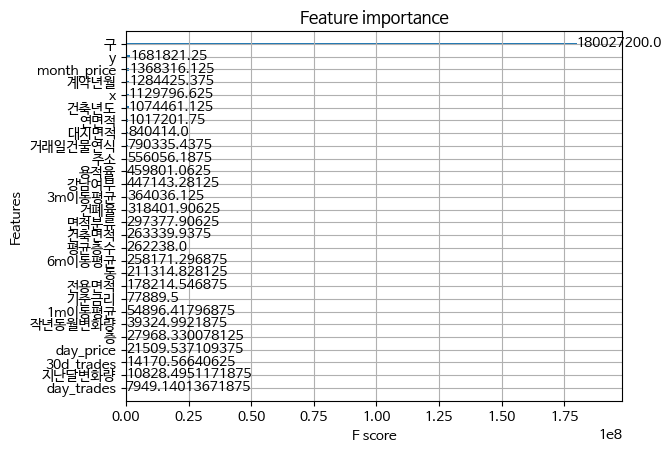

In [26]:
xgb.plot_importance(model, importance_type='gain')
plt.show()

In [ ]:
xgb.plot_importance(model, importance_type='total_cover')
plt.show()


In [ ]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [28]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('./temp/saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- 어떤 변수가 유용한 변수인지 확인해보기 위해 permutation selection을 이용해보겠습니다.

In [18]:
# Permutation importance 방법을 변수 선택에 이용해보겠습니다.
perm = PermutationImportance(model,        # 위에서 학습된 모델을 이용하겠습니다.
                             scoring = "neg_mean_squared_error",        # 평가 지표로는 회귀문제이기에 negative rmse를 사용합니다. (neg_mean_squared_error : 음의 평균 제곱 오차)
                             random_state = 42,
                             n_iter=3).fit(X_val_1, y_val_1)
eli5.show_weights(perm, feature_names = X_val_1.columns.tolist())    # valid data에 대해 적합시킵니다.

Weight,Feature
152457.7358 ± 1336.7895,y
94632.0826 ± 1179.6853,구
71107.7857 ± 1803.3000,x
57362.0586 ± 428.2713,건축년도
37153.7734 ± 364.4511,주소
24220.0074 ± 412.5895,전용면적
17481.7956 ± 94.6453,거래일건물연식
13875.7795 ± 126.0001,연면적
7418.0388 ± 190.7227,대지면적
5594.7302 ± 179.9437,동


- 분석 결과 "계약년", "전용면적" 변수가 유의한 변수로 보입니다. 따라서 이 변수로 또 다른 파생변수를 더 생성해보거나, 중요도가 낮아보이는 변수를 제거해 차원의 저주를 막아볼 수도 있습니다.

### 5.4. Valid prediction 분석

- 예측값을 분석해보기 위해 valid prediction을 확인해보겠습니다.

In [ ]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [ ]:
X_val_sort.head()

- 예측을 잘 하지 못한 top 100개의 데이터와 예측을 잘한 top 100개의 데이터를 비교해보겠습니다.

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [ ]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

- 이제 분포를 비교해보도록 하겠습니다.

In [ ]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 prediction의 target 분포')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 prediction의 target 분포')
plt.show()

- Taget 분포를 보니 좋은 예측을 보인 top 100개의 data보다 상대적으로 나쁜 예측을 보인 top 100 dataset들이 높은 가격을 보였음을 확인할 수 있습니다. 이에 대한 모델링 및 처리가 필요해보입니다.

In [ ]:
sns.histplot(data = error_top100, x='전용면적', alpha=0.5)
sns.histplot(data = best_top100, x='전용면적', color='orange', alpha=0.5)
plt.title('전용면적 분포 비교')
plt.show()

- 전용면적 또한 나쁜 예측을 보인 집들이 더 넓음을 확인할 수 있습니다.

## 6. Inference

In [80]:
dt_test.head(2)      # test dataset에 대한 inference를 진행해보겠습니다.

,번지,본번,부번,전용면적,계약일,층,건축년도,주소,x,y,...,건축면적,연면적,대지면적,건폐율,용적율,평균층수,target,계약년월,기준금리,면적분류
1179487,4284,1115,2,79.9700,26,5,1987,32,127.056841,37.476283,...,4551.3300,22305.9300,171124.438613,297.162458,3139.237949,4.90097,0,198,3.5,3
1179488,4260,1108,2,108.2017,15,10,2021,25,127.057251,37.484828,...,2706.0317,31893.0189,164008.524870,297.009766,3135.924895,11.78590,0,199,3.5,4


In [56]:
dt_test1.head(2)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0


In [96]:
# 저장된 모델을 불러옵니다.
with open('./temp/saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [97]:
type(model)

xgboost.sklearn.XGBRegressor

In [101]:
dt_test.head()

,번지,본번,부번,전용면적,계약일,층,건축년도,주소,x,y,...,건축면적,연면적,대지면적,건폐율,용적율,평균층수,target,계약년월,기준금리,면적분류
1179487,4284,1115,2,79.9700,26,5,1987,32,127.056841,37.476283,...,4551.3300,22305.9300,171124.438613,297.162458,3139.237949,4.900970,0,198,3.5,3
1179488,4260,1108,2,108.2017,15,10,2021,25,127.057251,37.484828,...,2706.0317,31893.0189,164008.524870,297.009766,3135.924895,11.785900,0,199,3.5,4
1179489,4261,1109,1,161.0000,28,15,1984,26,127.056014,37.483973,...,4484.9400,61999.0800,182777.081525,298.642771,3159.119616,13.823837,0,198,3.5,4
1179490,4261,1109,1,133.4600,10,14,1984,26,127.056014,37.483973,...,4484.9400,61999.0800,182777.081525,298.642771,3159.119616,13.823837,0,199,3.5,4
1179491,4261,1109,1,104.4300,18,6,1984,26,127.056014,37.483973,...,4484.9400,61999.0800,182777.081525,298.642771,3159.119616,13.823837,0,199,3.5,4


In [99]:
print(real_test_pred.shape)
print(dt_test['전용면적'].shape)

(9390,)
(9390,)


In [61]:
dt_test1.columns

Index(['번지', '본번', '부번', '전용면적', '층', '건축년도', 'target', '주소', 'x', 'y',
       '거래취소여부', '거래일건물연식', '구', '동', '강남여부', '신축여부', '건축면적', '연면적', '대지면적',
       '건폐율', '용적율', '평균층수', '계약년월', '기준금리', '면적분류', '계약날짜'],
      dtype='object')

In [62]:
zero_col = ['target']
dt_test1[zero_col] = 0

nan_col = ['day_price', 'month_price', '작년동월변화량', '지난달변화량']
dt_test1[nan_col] = np.nan

In [29]:
dt_test1.head(10)

,전용면적,층,건축년도,target,주소,x,y,거래취소여부,거래일건물연식,구,...,평균층수,index,계약년월,기준금리,면적분류,1m이동평균,3m이동평균,6m이동평균,30d_trades,day_trades
1074321,59.9825,13,2017,0,1544,126.818376,37.557768,0,6,3,...,7.215934,1120329,198,3.5,2,NaN,NaN,NaN,3629.0,199
1074322,59.4000,9,1999,0,4835,126.920126,37.574992,0,24,13,...,14.062040,1124096,198,3.5,2,NaN,NaN,NaN,3629.0,199
1074323,59.9600,17,2016,0,4827,126.935551,37.543211,0,7,12,...,7.215934,1124048,198,3.5,2,NaN,NaN,NaN,3629.0,199
1074324,84.9300,6,2019,0,2130,126.943320,37.478120,0,4,4,...,7.215934,1120400,198,3.5,3,NaN,NaN,NaN,3629.0,199
1074325,164.9500,19,2002,0,8900,127.054439,37.488223,0,21,0,...,38.775494,1119074,198,3.5,4,NaN,NaN,NaN,3629.0,199
1074326,59.5800,5,2004,0,2116,126.960865,37.487311,0,19,4,...,18.461847,1120417,198,3.5,2,NaN,NaN,NaN,3629.0,199
1074327,32.7600,3,2001,0,5127,126.951298,37.578353,0,22,13,...,12.076126,1123894,198,3.5,1,NaN,NaN,NaN,3629.0,199
1074328,121.0751,2,2006,0,5383,126.987614,37.493612,0,17,14,...,12.982759,1123874,198,3.5,4,NaN,NaN,NaN,3629.0,199
1074329,117.1900,7,1991,0,5319,126.982577,37.474408,0,32,14,...,11.658905,1123867,198,3.5,4,NaN,NaN,NaN,3629.0,199
1074330,114.9800,13,1999,0,2063,126.952078,37.476152,0,24,4,...,13.903968,1120445,198,3.5,4,NaN,NaN,NaN,3629.0,199


In [30]:
# %%time
X_test = dt_test1.drop(['target'], axis=1)

test_pred = model.predict(X_test)
test_pred = test_pred * dt_test1['전용면적'].values

In [36]:
dt_test1 = dt_test1.reset_index(drop=True) 

In [39]:
test_sort = pd.DataFrame(test_pred, columns=['pred'])
test_sort['index'] = dt_test1['index']

test_sort = test_sort.sort_values(by='index')

# test_sort
real_test_pred = test_sort['pred'].to_numpy()

In [40]:
real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

array([131201.75744629, 153216.75075525, 176045.10803223, ...,
        61074.9792511 ,  53466.837146  ,  53330.80715637])

In [28]:
dt_test1['target']

984608    0
984609    0
984610    0
984611    0
984612    0
         ..
993441    0
993442    0
993443    0
993444    0
993445    0
Name: target, Length: 8838, dtype: int64

In [24]:
real_test_pred

984608     66610.055508
984609     83625.753814
984610     49876.575773
984611     56268.912423
984612     36016.353195
              ...      
993441     60044.637107
993442     44151.529419
993443    140809.916250
993444     64209.203937
993445    144860.863367
Name: 전용면적, Length: 8838, dtype: float64

In [22]:
# dt_test1_val = dt_test1_val * dt_test1['전용면적']
# real_test_pred = real_test_pred *dt_test1['전용면적']

In [65]:
rmse = np.sqrt(mean_squared_error(dt_test1_val, real_test_pred))
print(f"RMSE: {rmse}")

RMSE: 30350.033176903933


## 7. Output File Save

In [41]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('./temp/output.csv', index=False)